In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from statsmodels.tsa.vector_ar.var_model import VAR

In [2]:
# 2.Load Dataset
data = pd.read_csv("hanoi_quality.csv")
data

,date,pm25,pm10,o3,no2,so2,co
0,3/1/2019,76,1,15,36,7,7
1,3/2/2019,117,64,4,28,3,5
2,3/3/2019,10,64,1,22,16,5
3,3/4/2019,118,56,13,22,14,6
4,3/5/2019,2,34,15,21,6,6
...,...,...,...,...,...,...,...
1915,5/28/2024,85,56,14,1,8,6
1916,5/29/2024,58,50,13,1,8,6
1917,5/30/2024,47,39,10,1,8,8
1918,5/31/2024,48,63,10,1,8,8


In [3]:
#kích thước dữ liệu
data.shape
data.info()
#Mô tả bộ dữ liệu
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1920 non-null   object
 1   pm25    1920 non-null   int64 
 2   pm10    1920 non-null   int64 
 3   o3      1920 non-null   int64 
 4   no2     1920 non-null   int64 
 5   so2     1920 non-null   int64 
 6   co      1920 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 105.1+ KB


,pm25,pm10,o3,no2,so2,co
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,63.091667,39.147917,16.548958,19.444271,11.690104,7.580208
std,40.260213,21.942295,16.580522,10.014321,6.428450,2.986652
min,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,32.000000,22.000000,8.000000,13.000000,7.000000,5.000000
50%,54.500000,36.000000,14.000000,19.000000,11.000000,7.000000
75%,88.000000,54.000000,21.000000,27.000000,17.000000,9.000000
max,217.000000,121.000000,441.000000,53.000000,43.000000,21.000000


In [4]:
#Chọn thuộc tính
data = data[['pm25','pm10']]
data = data.dropna() 
data = data.reset_index(drop=True) 
data

,pm25,pm10
0,76,1
1,117,64
2,10,64
3,118,56
4,2,34
...,...,...
1915,85,56
1916,58,50
1917,47,39
1918,48,63


<Axes: >

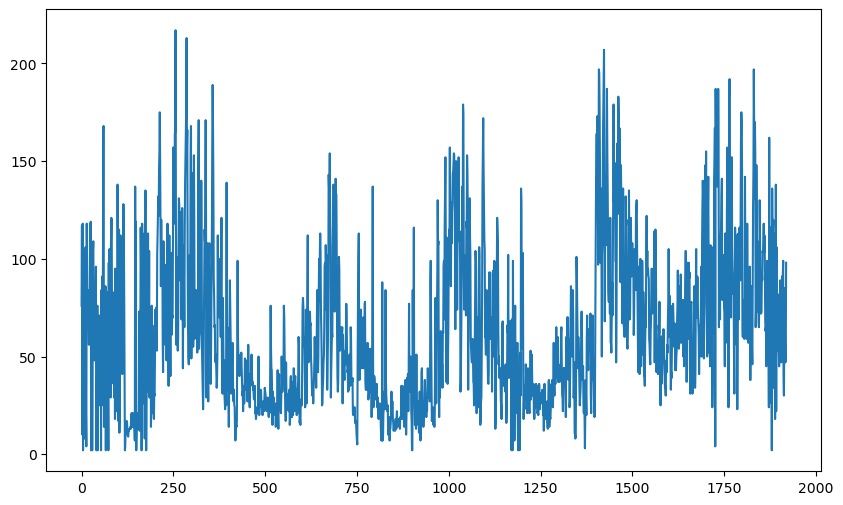

In [5]:
data['pm25'].plot(figsize=(10,6))

In [6]:
# Split the data into training, testing
train_size = int(0.8 * len(data))
test_size = int(0.2 * len(data))

train_data = data[:train_size]
test_data = data[train_size:]

# Kiểm tra kích thước của từng tập
print("Train data size:", len(train_data))
print("Test data size:", len(test_data))

Train data size: 1536
Test data size: 384


In [7]:
# 3. Quá trình Training
model = VAR(train_data)
model_fitted = model.fit()

In [8]:
# 4. Quá trình testing 
# Dự đoán cho cả 'pm25' và 'o3'
y_pred = model_fitted.forecast(train_data.values[-model_fitted.k_ar:], steps=len(test_data))

In [9]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index = data.index[-1]
next_30_days_index = pd.RangeIndex(start=last_index + 1, stop=last_index + 31, step=1)

# Dự đoán cho 30 ngày tiếp theo
y_next_30_days = model_fitted.forecast(model_fitted.endog[-model_fitted.k_ar:], steps=90)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_30_days)


Predicted closing prices for the next 90 days:
[[76.46789267 46.03585649]
 [76.14443434 43.46939344]
 [73.13448579 41.78977451]
 [70.28487356 40.51426834]
 [67.94360104 39.51012547]
 [66.06964961 38.71344524]
 [64.57771258 38.08033124]
 [63.39122771 37.57702998]
 [62.44787569 37.17689637]
 [61.69787015 36.85877816]
 [61.10158939 36.60586388]
 [60.62752621 36.40478871]
 [60.25063028 36.24492731]
 [59.95098554 36.11783221]
 [59.71275808 36.0167874 ]
 [59.52335937 35.93645345]
 [59.37278114 35.87258529]
 [59.25306647 35.821808  ]
 [59.15788935 35.78143838]
 [59.08222039 35.74934319]
 [59.02206107 35.72382646]
 [58.97423242 35.70353981]
 [58.93620706 35.68741126]
 [58.90597565 35.67458853]
 [58.88194068 35.66439403]
 [58.86283208 35.65628907]
 [58.84764011 35.64984535]
 [58.83556199 35.64472239]
 [58.82595949 35.64064946]
 [58.81832519 35.63741135]
 [58.81225566 35.63483695]
 [58.80743019 35.63279021]
 [58.80359378 35.63116299]
 [58.8005437  35.62986929]
 [58.7981188  35.62884076]
 [58.796

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Tính RMSE
rmse = np.sqrt(mean_squared_error(test_data['pm25'], y_pred[:, 0]))
print('Testing RMSE:', rmse)

# Tính MAE
mae = mean_absolute_error(test_data['pm25'], y_pred[:, 0])
print('\nTesting MAE:', mae)

# Tính MAPE
mape = np.mean(np.abs((test_data['pm25'] - y_pred[:, 0]) / test_data['pm25'])) * 100
print('\nTesting MAPE:', mape)


Testing RMSE: 41.47729151488349

Testing MAE: 30.264278523941865

Testing MAPE: 45.24283382212439


In [11]:
test_data.index

RangeIndex(start=1536, stop=1920, step=1)

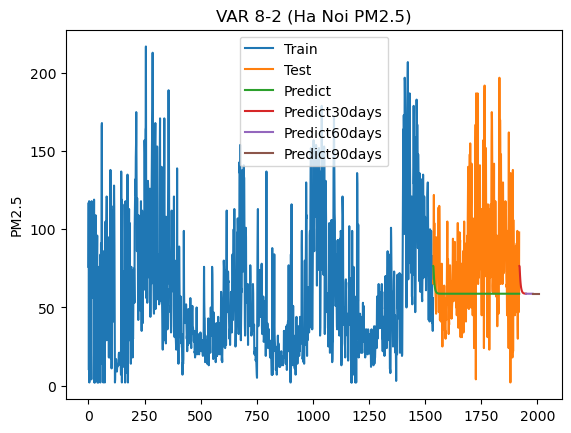

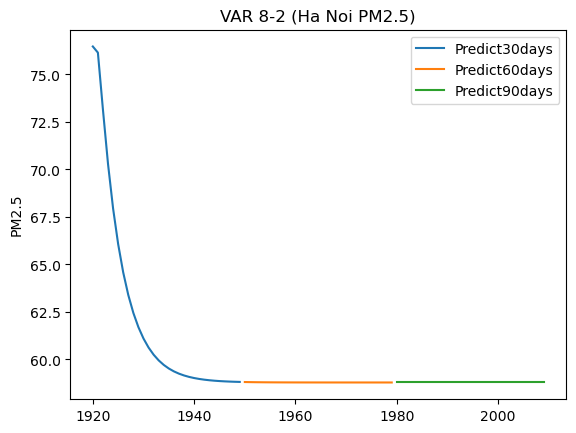

In [12]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['pm25'])
plt.plot(test_data.index, test_data['pm25'])
plt.plot(test_data.index, y_pred[:, 0])


last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_30_days[0:30][:, 0])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_30_days[30:60][:, 0])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_30_days[60:90][:, 0])
plt.legend(['Train','Test','Predict','Predict30days', 'Predict60days', 'Predict90days'])
plt.title('VAR 8-2 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()


#DỰ đians 90 ngày
last_data = pd.RangeIndex(start=last_index+1, stop=last_index+31, step=1)
plt.plot(last_data,y_next_30_days[0:30][:, 0])

last_data = pd.RangeIndex(start=last_index+31, stop=last_index+61, step=1)
plt.plot(last_data,y_next_30_days[30:60][:, 0])

last_data = pd.RangeIndex(start=last_index+61, stop=last_index+91, step=1)
plt.plot(last_data,y_next_30_days[60:90][:, 0])
plt.legend(['Predict30days', 'Predict60days', 'Predict90days'])
plt.title('VAR 8-2 (Ha Noi PM2.5)')
plt.ylabel('PM2.5')
plt.show()

